# Using LR Schedulers

The notebook demonstrates how to configure simple LR schedulers with Hyrax. A list of LR schedulers can be found in the PyTorch documentation here: https://docs.pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.LRScheduler.html.

Hyrax config does not support chained or sequential LR schedulers; those must be directly defined in the model if desired to be used. This notebook will walk through the default LR used in Hyrax as well as defining an ExponentialLR defined in the config.

## The Default Scheduler in Hyrax

When no scheduler is specified in the user-defined config or in the model, Hyrax uses an [ExponentialLR](https://docs.pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ExponentialLR.html) scheduler with `gamma = 1`; this means it simply multiplies the starting learning rate by 1 on each epoch, which leads to no practical effect.

We begin by setting up and training a HyraxCNN model with the CIAR10 dataset, like in the [Getting Started](<getting_started.ipynb>) notebook. For more information on this model, see there.

In [2]:
from hyrax import Hyrax

h = Hyrax()
h.set_config("model.name", "HyraxCNN")

data_request_definition = {
    "train": {
        "data": {
            "dataset_class": "HyraxCifarDataset",
            "data_location": "./data",
            "fields": ["image", "label"],
            "primary_id_field": "object_id",
        },
    },
    "infer": {
        "data": {
            "dataset_class": "HyraxCifarDataset",
            "data_location": "./data",
            "fields": ["image", "object_id"],
            "primary_id_field": "object_id",
            "dataset_config": {
                "use_training_data": False,
            },
        },
    }
}

h.set_config("data_request", data_request_definition)
trained_model = h.train()

[2026-02-12 10:19:51,068 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2026-02-12 10:19:51,069 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2026-02-12 10:19:51,070 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.lr_scheduler.ExponentialLR.
[2026-02-12 10:19:51,071 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.
[2026-02-12 10:19:51,084 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2026-02-12 10:19:51,085 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2026-02-12 10:19:51,086 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.lr_scheduler.ExponentialLR.
[2026-02-12 10:19:51,087 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.
[2026-02-12 10:19:51,094 hyrax.config_utils:WARNING] Runtime config contains key or section 'data_

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

[2026-02-12 10:20:55,551 hyrax.pytorch_ignite:INFO] Total training time: 56.73[s]
2026/02/12 10:20:55 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2026/02/12 10:20:55 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!
[2026-02-12 10:20:55,566 hyrax.verbs.train:INFO] Finished Training


## Performance of the model

Assuming everything is working properly, the resulting accuracy on the test set and confusion matrix shouldn't be much different from what is in the [Getting Started](<getting_started.ipynb>) notebook

In [ ]:
inference_results = h.infer()

In [ ]:
import numpy as np

predicted_classes = np.argmax(inference_results, axis = 1)

In [5]:
import pickle

with open("./data/cifar-10-batches-py/test_batch", "rb") as f_in:
    test_data = pickle.load(f_in, encoding="bytes")


Accuracy for test dataset: 0.4486


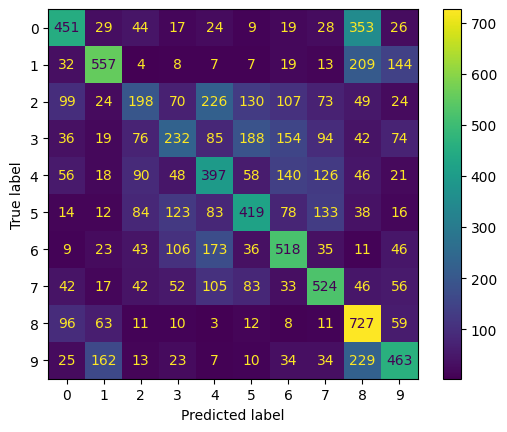

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_true = test_data[b"labels"]
y_pred = predicted_classes.tolist()

correct = 0
for t, p in zip(y_true, y_pred):
    correct += t == p

print("\nAccuracy for test dataset:", correct / len(y_true))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Both the overall accuracy and the confusion matrix resemble what we see in the (<getting_started.ipynb>) notebook.